# Prerequisite

In [35]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Load datasets into dataframe

In [2]:
data = pd.read_csv('Supermarket.csv')

# First things first, getting insight of data

In [3]:
data.head()

,StoreID,DeptID,Sales,Holiday,Temperature,Fuel,CPI,Unemployment,Type,Size
0,9,42,3687.22,0,63.96,3.372,221.315956,6.054,B,125833
1,2,33,16810.49,0,88.70,2.664,211.259659,8.099,A,202307
2,40,51,4.16,0,67.45,3.898,135.963935,4.584,A,155083
3,34,42,4940.41,0,73.80,2.640,126.085452,9.816,A,158114
4,4,48,3834.00,0,68.97,3.721,131.010333,4.077,A,205863


In [4]:
data.tail()

,StoreID,DeptID,Sales,Holiday,Temperature,Fuel,CPI,Unemployment,Type,Size
339495,34,94,32266.45,0,72.87,2.621,126.089290,9.816,A,158114
339496,12,81,7444.03,0,48.45,3.530,128.130000,14.021,B,112238
339497,37,8,17543.67,0,77.17,3.749,220.354503,6.989,C,39910
339498,29,98,16.50,0,31.96,2.747,131.637000,10.064,B,93638
339499,31,83,7200.99,0,82.57,2.577,211.188693,8.099,A,203750


# Exploratory data analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339500 entries, 0 to 339499
Data columns (total 10 columns):
StoreID         339500 non-null int64
DeptID          339500 non-null int64
Sales           339500 non-null float64
Holiday         339500 non-null int64
Temperature     339500 non-null float64
Fuel            339500 non-null float64
CPI             339500 non-null float64
Unemployment    339500 non-null float64
Type            339500 non-null object
Size            339500 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 25.9+ MB


In [6]:
data.describe()

,StoreID,DeptID,Sales,Holiday,Temperature,Fuel,CPI,Unemployment,Size
count,339500.000000,339500.000000,339500.000000,339500.000000,339500.000000,339500.000000,339500.000000,339500.000000,339500.000000
mean,22.191638,44.260280,16001.980761,0.070412,60.055135,3.360916,171.123530,7.959892,136697.851234
std,12.781567,30.483967,22774.966766,0.255841,18.453098,0.458574,39.158082,1.862687,60955.945168
min,1.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2085.147500,0.000000,46.660000,2.933000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7622.250000,0.000000,62.060000,3.452000,182.238988,7.866000,140167.000000
75%,33.000000,74.000000,20214.957500,0.000000,74.240000,3.738000,212.403576,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,227.232807,14.313000,219622.000000


# Data Preprocessing

## Missing values

In [7]:
print(data.isnull().any())

StoreID         False
DeptID          False
Sales           False
Holiday         False
Temperature     False
Fuel            False
CPI             False
Unemployment    False
Type            False
Size            False
dtype: bool


Good to see, we don't have missing values!

## Bad sales values

In [8]:
index = data[ (data['Sales'] <= 0 )].index

In [9]:
index

Int64Index([   353,    579,    582,    619,    658,    856,   1041,   1179,
              1437,   1547,
            ...
            336572, 337253, 337667, 338283, 338388, 338752, 338817, 339166,
            339231, 339459],
           dtype='int64', length=1112)

Ok, let's remove few bad sales values.

In [10]:
data.drop(index, inplace=True)

In [11]:
data.head()

,StoreID,DeptID,Sales,Holiday,Temperature,Fuel,CPI,Unemployment,Type,Size
0,9,42,3687.22,0,63.96,3.372,221.315956,6.054,B,125833
1,2,33,16810.49,0,88.70,2.664,211.259659,8.099,A,202307
2,40,51,4.16,0,67.45,3.898,135.963935,4.584,A,155083
3,34,42,4940.41,0,73.80,2.640,126.085452,9.816,A,158114
4,4,48,3834.00,0,68.97,3.721,131.010333,4.077,A,205863


# Feature engineering

### Label encoding

In [12]:
# Create the Labelencoder object
le = preprocessing.LabelEncoder()

# Convert the categorical columns into numeric
data['Type'] = le.fit_transform(data['Type'])

In [13]:
data.head()

,StoreID,DeptID,Sales,Holiday,Temperature,Fuel,CPI,Unemployment,Type,Size
0,9,42,3687.22,0,63.96,3.372,221.315956,6.054,1,125833
1,2,33,16810.49,0,88.70,2.664,211.259659,8.099,0,202307
2,40,51,4.16,0,67.45,3.898,135.963935,4.584,0,155083
3,34,42,4940.41,0,73.80,2.640,126.085452,9.816,0,158114
4,4,48,3834.00,0,68.97,3.721,131.010333,4.077,0,205863


Great, Type strings are now converted to numeric values.

# Correlation analysis

In [14]:
%matplotlib inline  

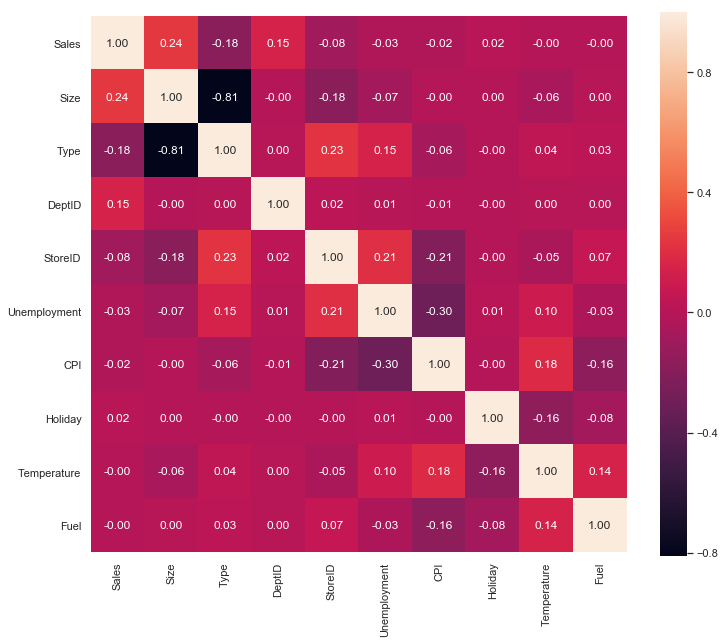

In [15]:
correlation = np.abs(data.corr(method='pearson'))
columns = correlation.nlargest(10, 'Sales').index

fig=plt.figure(figsize=(12, 10))
correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

# Data Preparation

In [16]:
# Log scale
data['Sales'] = np.log(data['Sales'])

# X and Y data
X = data[columns]
Y = X['Sales'].values
X = X.drop('Sales', axis = 1).values

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.30, random_state=42)

# Baseline algorithm selection through cross-validation

In [17]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -3.744593 (0.051674)
ScaledLASSO: -4.203533 (0.061291)
ScaledEN: -4.084721 (0.060362)
ScaledRF: -0.225126 (0.008389)
ScaledCART: -0.360067 (0.015655)
ScaledGBM: -1.426808 (0.044298)


Looks like random forest performed best among the algorithms! So, we will proceed with random forest, and tune the hyperparameters!

# Hyperparameter selection for random forest

In [20]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([5,10,20,30]))
model = RandomForestRegressor(random_state=21)
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

-0.249486 (0.010609) with: {'n_estimators': 5}
-0.227415 (0.009734) with: {'n_estimators': 10}
-0.216504 (0.009657) with: {'n_estimators': 20}
-0.212385 (0.009103) with: {'n_estimators': 30}
Best: -0.212385 using {'n_estimators': 30}


# Final model training

In [21]:
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = RandomForestRegressor(random_state=21, n_estimators=30)
model.fit(rescaled_X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=21, verbose=0, warm_start=False)

# Validate model on test dataset

In [22]:
# Transform the validation dataset
rescaled_X_test = scaler.transform(X_test)

# Predictions
predictions = model.predict(rescaled_X_test)

# Actual test and predictions from log scaled data
actual_y_test = np.exp(Y_test)
actual_predicted = np.exp(predictions)

# Visualization

(0, 130000)

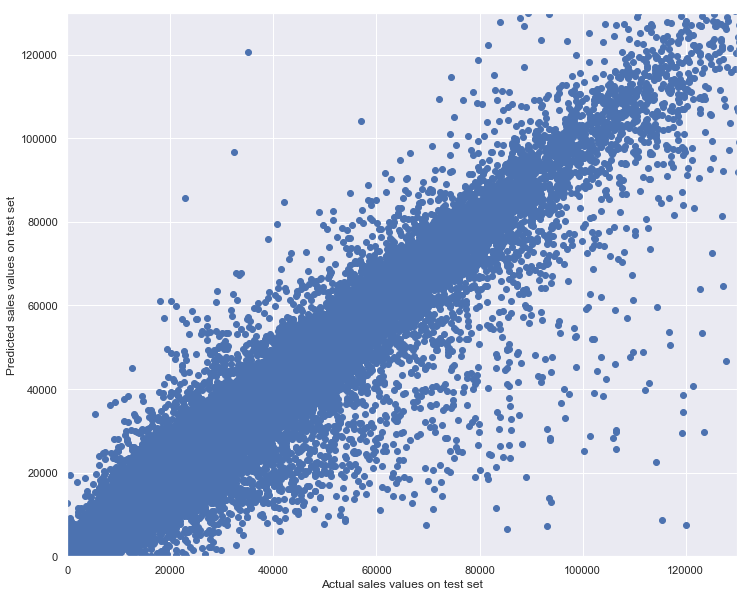

In [32]:
fig=plt.figure(figsize=(12, 10))
plt.scatter(actual_y_test, actual_predicted)
plt.xlabel("Actual sales values on test set")
plt.ylabel("Predicted sales values on test set")
plt.xlim([0, 130000])
plt.ylim([0, 130000])

# Final scores on test dataset

In [36]:
print("Correlation= ", np.corrcoef(actual_y_test, actual_predicted)[0,1])
print ("RMSE= ", np.sqrt(mean_squared_error(actual_y_test, actual_predicted)))

Correlation=  0.9635713829639839
RMSE=  6130.135135454318


### We have achieved very good correlation and RMSE metrics through random forest!